In [1]:
import librosa
import music21  # yes! new favorite library
import numpy as np
from scipy.fft import fft, fftfreq, rfft, rfftfreq
import pandas as pd

from IPython.display import Audio
import plotly.express as px
import matplotlib.pyplot as plt


In [2]:
AUDIO = "D:\\Github\\Music-Rec-RAC-DataSci\\org song\\วงวน - SERIOUS BACON ( ORIGINAL by ONEONE )\\vocals.mp3"

y, sr = librosa.load(AUDIO)
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env)
timestamps = librosa.frames_to_time(onset_frames, sr=sr)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [3]:
sg0 = librosa.stft(y)
sg_mag, sg_phase = librosa.magphase(sg0)


In [4]:
y.shape

(6194304,)

In [5]:
sg0.shape

(1025, 12099)

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_29820\121462342.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(sg0[:,:],


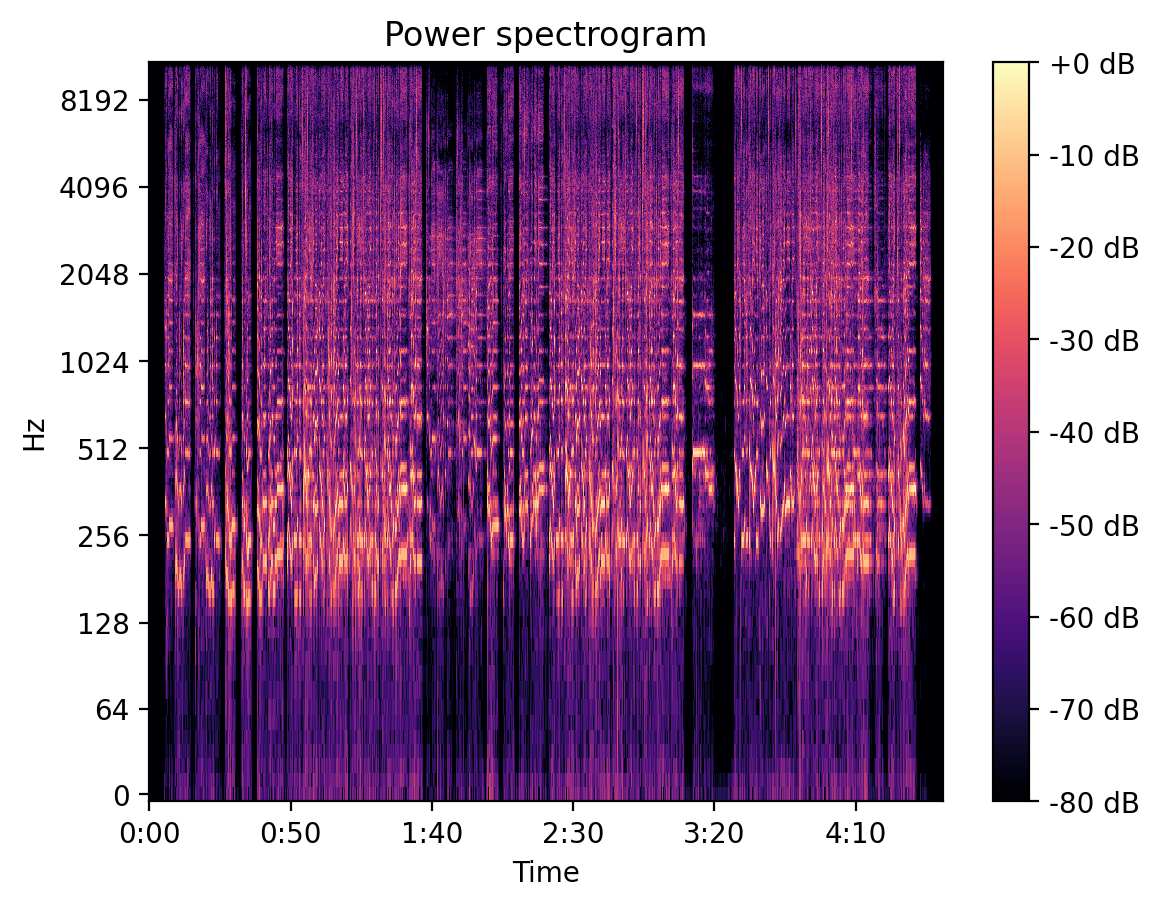

In [6]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(sg0[:,:],
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [7]:
# Window Sliding 
arr = []

xf = librosa.fft_frequencies(sr=sr, n_fft=2048)
for y_idx in range(sg_mag.shape[1]):
    current = sg_mag[:, y_idx]
    idx = np.argmax(np.abs(current))
    freq = xf[idx]
    arr.append({'freq': freq, 'mag': current[idx]})
    
df = pd.DataFrame(arr)
df['freq']
df['time'] = df.index.map(lambda x: librosa.frames_to_time(x, sr=sr))
df[df['freq']>8000]

,freq,mag,time
865,8053.417969,9.048599,20.085261
866,8053.417969,9.120833,20.108481
922,8580.981445,8.036984,21.408798
923,8580.981445,8.558212,21.432018
924,9679.174805,9.901362,21.455238
925,9679.174805,10.321501,21.478458
926,9722.241211,6.136944,21.501678
1160,9000.878906,7.301456,26.935147
2096,8559.448242,0.993782,48.669025
2097,8516.381836,6.667894,48.692245


In [8]:
librosa.hz_to_note(2190.0)

'C♯7'

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

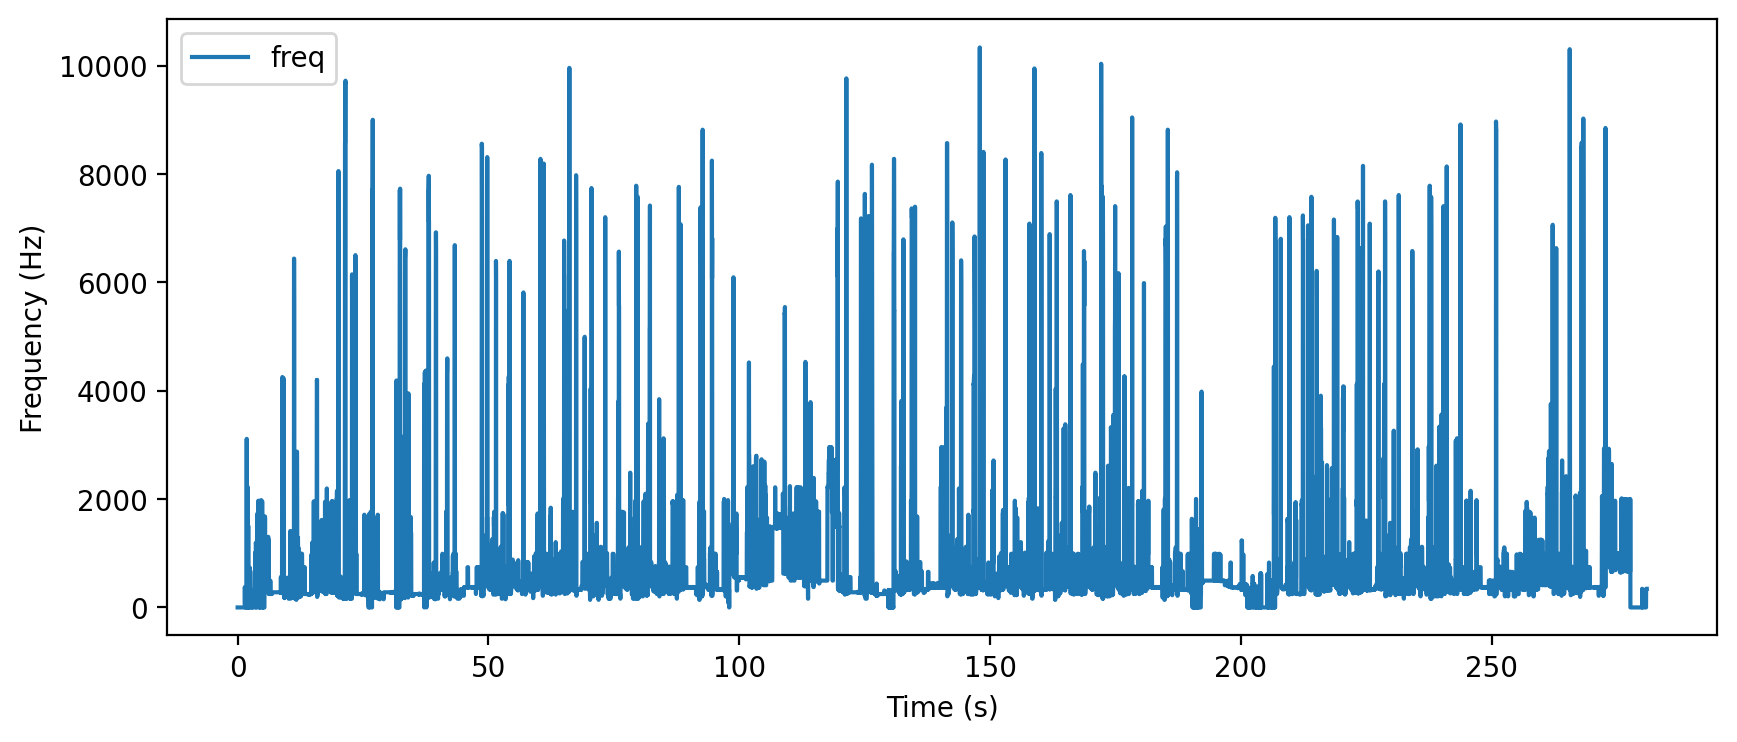

In [9]:
df.plot(x='time', y='freq', xlabel='Time (s)', ylabel='Frequency (Hz)', kind='line', figsize=(10,4))

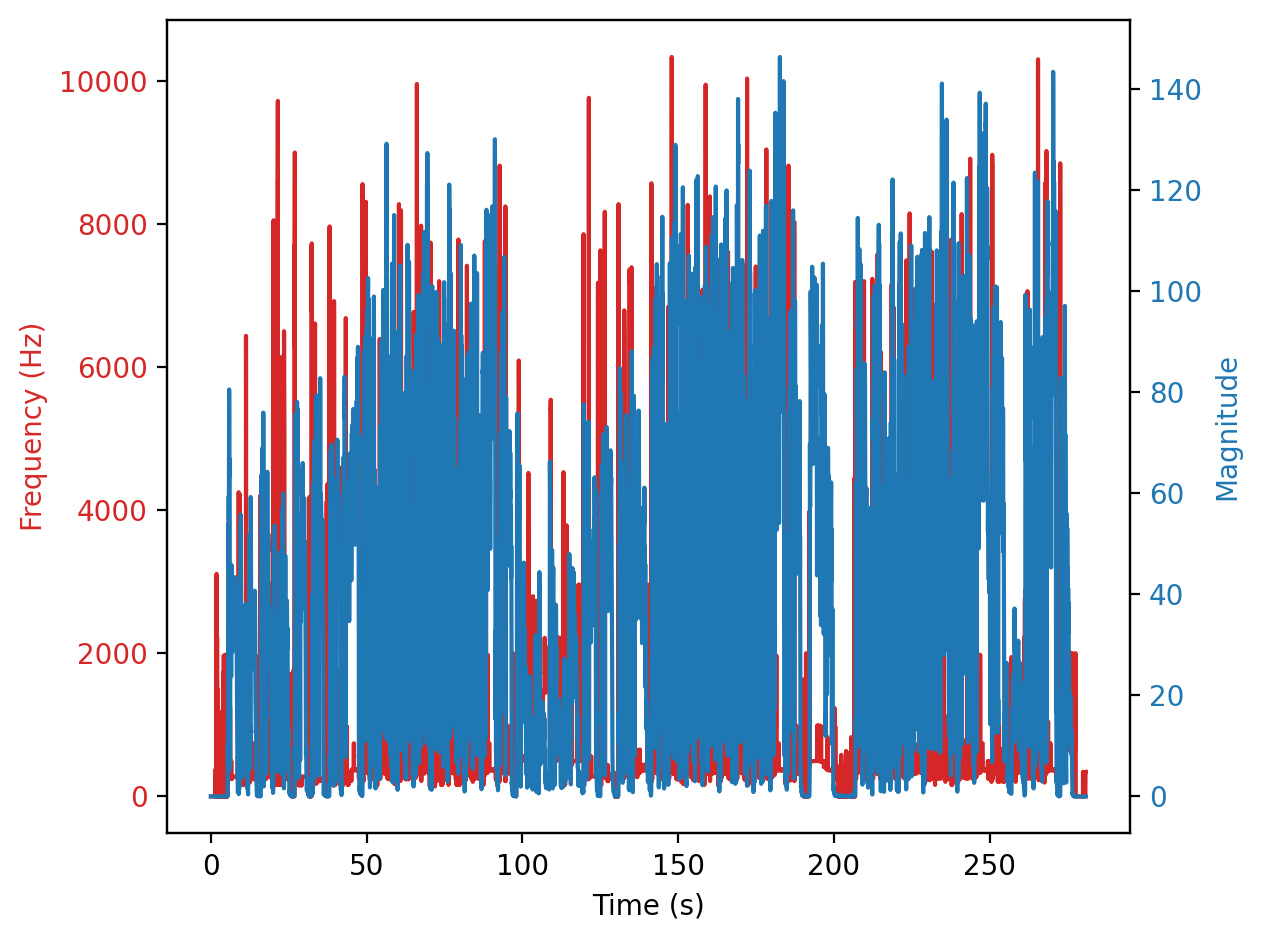

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency (Hz)', color=color)
ax1.plot(df['time'], df['freq'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Magnitude', color=color)
ax2.plot(df['time'], df['mag'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


<Axes: xlabel='time'>

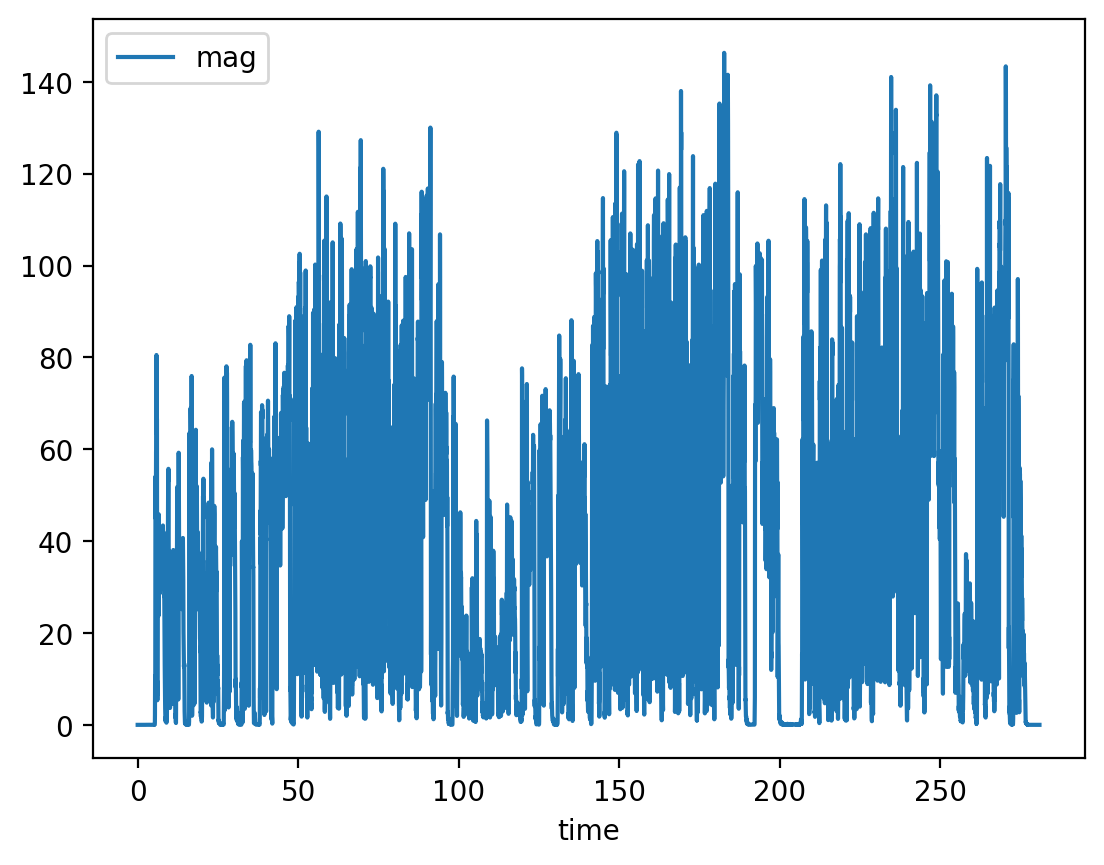

In [11]:
df[df['freq']<8000].plot(x='time', y='mag', kind='line')

In [12]:
y.shape[0]/sr

280.9208163265306

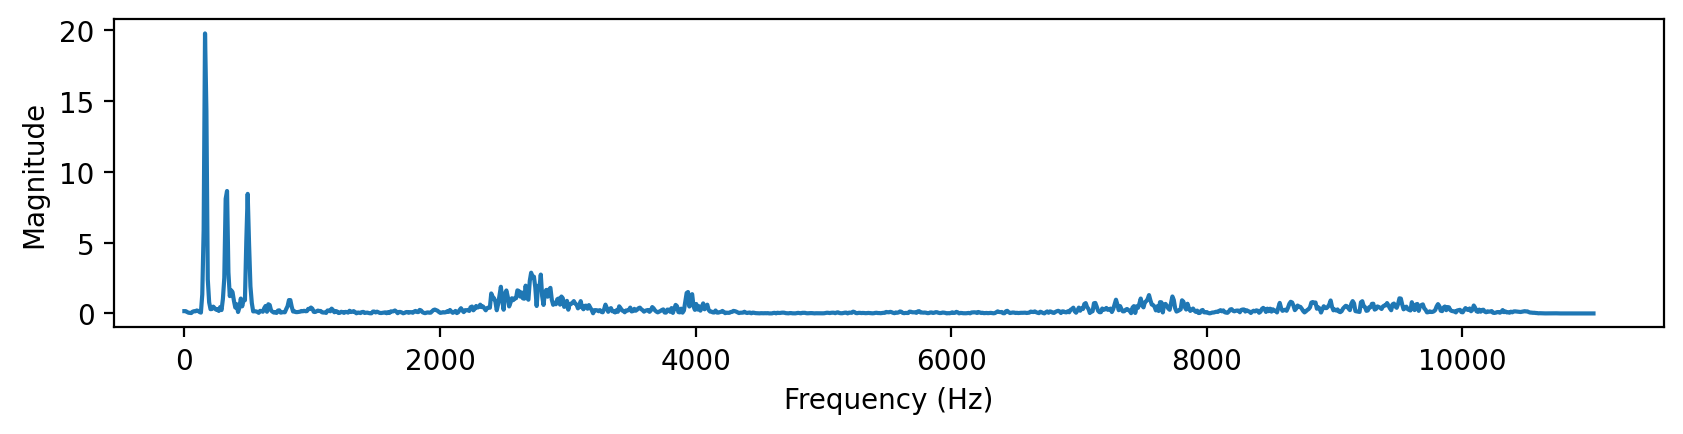

In [13]:
xf = librosa.fft_frequencies(sr=sr, n_fft=2048)
yf = sg0[:, 500]

plt.figure(figsize=(10, 2))
plt.plot(xf, np.abs(yf))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

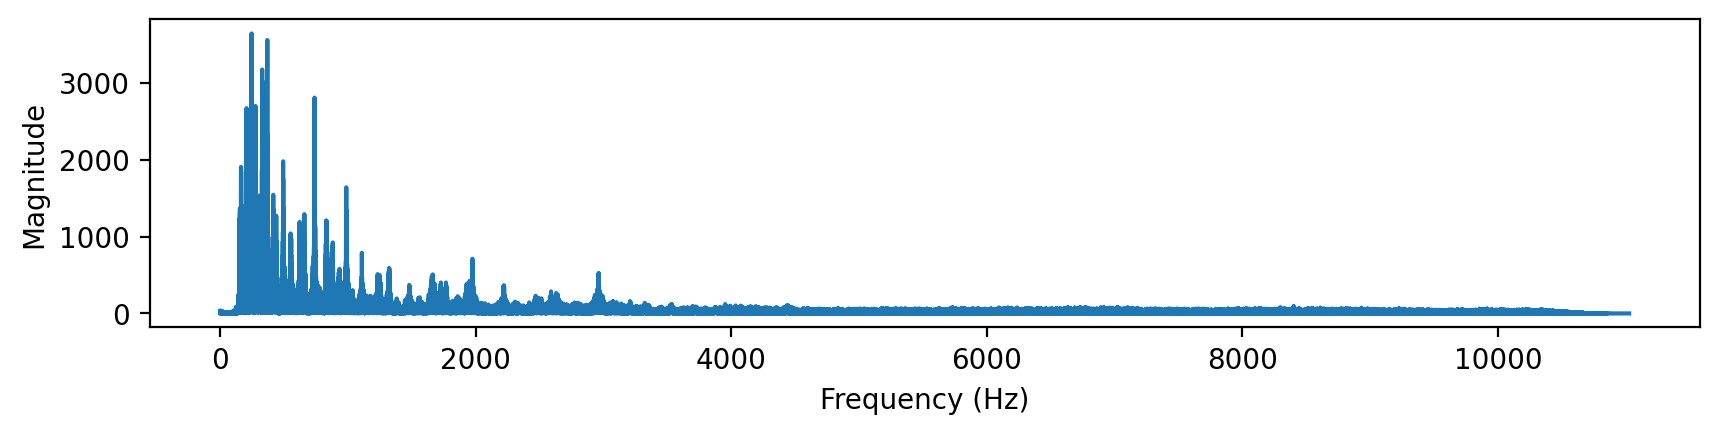

In [14]:
data = y.copy()
# start_time = 5.41024943
# end_time = 5.87464853

start_frame = 500
end_frame = 500+2048

start_time = librosa.frames_to_time(start_frame, sr=sr)
end_time = librosa.frames_to_time(end_frame, sr=sr)

# start_time = 5.87464853 
# end_time = 6.22294785

start_frame = librosa.time_to_frames(start_time, sr=sr)
end_frame = librosa.time_to_frames(end_time, sr=sr)

onset_frame = onset_frames[np.where((onset_frames >= start_frame) & (onset_frames <= end_frame))]

# print(onset_frame)

# dataToRead = data[int(start_time * sr / 1000) : int(end_time * sr / 1000) + 1]
dataToRead = data[int(start_time * sr) : int(end_time * sr) + 1]

# dataToRead = data


Audio(data=dataToRead, rate=sr)

N = len(dataToRead)
yf = rfft(dataToRead)
xf = rfftfreq(N, 1 / sr)

idx = np.argmax(np.abs(yf))
freq = xf[idx]

plt.figure(figsize=(10, 2))
plt.plot(xf, np.abs(yf))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()